# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.047759e+01     7.998991e+00
 * time: 0.0018939971923828125
     1     2.765241e+01     4.455560e+00
 * time: 0.008007049560546875
     2     1.931313e+01     5.205081e+00
 * time: 0.01638484001159668
     3     1.311432e+01     3.239474e+00
 * time: 0.025354862213134766
     4     1.295892e+01     5.554362e+00
 * time: 0.03233504295349121
     5     1.261014e+01     4.521723e+00
 * time: 0.03931999206542969
     6     1.069750e+01     2.774106e+00
 * time: 0.046208858489990234
     7     9.182272e+00     1.350961e+00
 * time: 0.05325198173522949
     8     8.625892e+00     9.050655e-01
 * time: 0.06070899963378906
     9     8.390800e+00     8.159508e-01
 * time: 0.06903600692749023
    10     8.247770e+00     6.525877e-01
 * time: 0.07495403289794922
    11     8.148672e+00     3.904873e-01
 * time: 0.08056187629699707
    12     8.068837e+00     4.672950e-01
 * time: 0.08483695983886719
    13     8.025532e+00     3.421152e-01
 * 

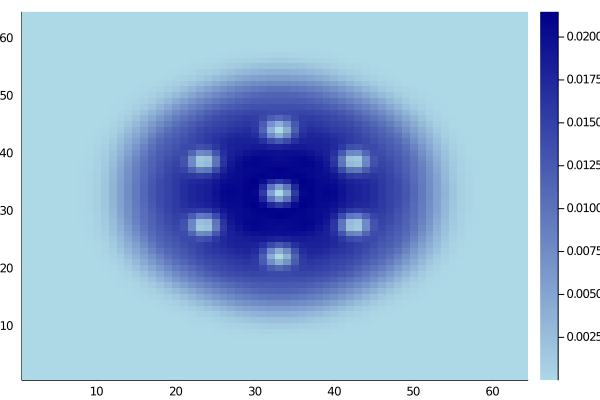

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)